In [1]:
import pandas as pd
wea=pd.read_csv("weather.csv",index_col="date")

In [2]:
wea=pd.DataFrame(wea)
wea.head()

,station,place,rain,temp,max,min
date,,,,,,
09-12-2015,IN022023000,"NEW DELHI PALAM, IN",NaN,66,75.0,56.0
10-12-2015,IN022023000,"NEW DELHI PALAM, IN",NaN,69,80.0,57.0
11-12-2015,IN022023000,"NEW DELHI PALAM, IN",NaN,62,76.0,NaN
12-12-2015,IN022023000,"NEW DELHI PALAM, IN",NaN,54,76.0,NaN
13-12-2015,IN022023000,"NEW DELHI PALAM, IN",NaN,56,70.0,NaN


In [3]:
wea.tail()

,station,place,rain,temp,max,min
date,,,,,,
23-06-2024,IN022021900,"NEW DELHI SAFDARJUN, IN",0.00,95,103.0,85.0
24-06-2024,IN022021900,"NEW DELHI SAFDARJUN, IN",0.02,92,104.0,NaN
25-06-2024,IN022021900,"NEW DELHI SAFDARJUN, IN",0.04,95,105.0,83.0
26-06-2024,IN022021900,"NEW DELHI SAFDARJUN, IN",0.00,93,103.0,89.0
27-06-2024,IN022021900,"NEW DELHI SAFDARJUN, IN",0.00,89,102.0,83.0


In [4]:
wea.apply(pd.isnull).sum()

station       0
place         0
rain       9330
temp          0
max        2425
min        3268
dtype: int64

In [5]:
del wea["station"]
del wea["place"]

In [6]:
wea.head()

,rain,temp,max,min
date,,,,
09-12-2015,NaN,66,75.0,56.0
10-12-2015,NaN,69,80.0,57.0
11-12-2015,NaN,62,76.0,NaN
12-12-2015,NaN,54,76.0,NaN
13-12-2015,NaN,56,70.0,NaN


In [7]:
wea["rain"].value_counts()

0.00    5769
0.08     197
0.04     192
0.02     178
0.01     163
        ... 
0.60       1
4.95       1
1.71       1
0.36       1
4.21       1
Name: rain, Length: 196, dtype: int64

In [8]:
wea["rain"].mean()

0.14096786201762004

In [9]:
i=0.14
wea["rain"]=wea["rain"].fillna(i)

In [10]:
wea["rain"].value_counts()

0.14    9333
0.00    5769
0.08     197
0.04     192
0.02     178
        ... 
1.04       1
0.26       1
1.07       1
4.36       1
4.21       1
Name: rain, Length: 196, dtype: int64

In [11]:
wea.apply(pd.isnull).sum()#17390

rain       0
temp       0
max     2425
min     3268
dtype: int64

In [12]:
wea=wea.fillna(method="bfill")

In [13]:
wea.apply(pd.isnull).sum()

rain    0
temp    0
max     0
min     0
dtype: int64

In [14]:
wea.dtypes

rain    float64
temp      int64
max     float64
min     float64
dtype: object

In [15]:
wea.index=pd.to_datetime(wea.index, dayfirst=True)

In [16]:
wea.index

DatetimeIndex(['2015-12-09', '2015-12-10', '2015-12-11', '2015-12-12',
               '2015-12-13', '2015-12-14', '2015-12-15', '2015-12-16',
               '2015-12-17', '2015-12-18',
               ...
               '2024-06-18', '2024-06-19', '2024-06-20', '2024-06-21',
               '2024-06-22', '2024-06-23', '2024-06-24', '2024-06-25',
               '2024-06-26', '2024-06-27'],
              dtype='datetime64[ns]', name='date', length=17389, freq=None)

In [17]:
wea.apply( lambda x: (x==9999).sum())

rain    0
temp    0
max     0
min     0
dtype: int64

In [18]:
import matplotlib as plt


<AxesSubplot:xlabel='date'>

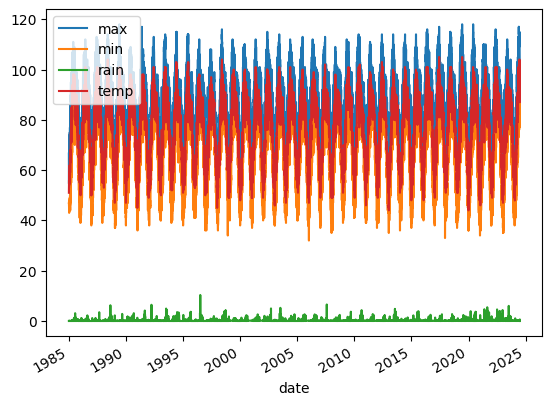

In [19]:
wea[["max","min","rain","temp"]].plot()

In [20]:
wea["target"]=wea.shift(-1)["max"]

In [21]:
wea


,rain,temp,max,min,target
date,,,,,
2015-12-09,0.14,66,75.0,56.0,80.0
2015-12-10,0.14,69,80.0,57.0,76.0
2015-12-11,0.14,62,76.0,44.0,76.0
2015-12-12,0.14,54,76.0,44.0,70.0
2015-12-13,0.14,56,70.0,44.0,70.0
...,...,...,...,...,...
2024-06-23,0.00,95,103.0,85.0,104.0
2024-06-24,0.02,92,104.0,83.0,105.0
2024-06-25,0.04,95,105.0,83.0,103.0


In [22]:
wea=wea.iloc[:-1,:].copy()

In [23]:
wea

,rain,temp,max,min,target
date,,,,,
2015-12-09,0.14,66,75.0,56.0,80.0
2015-12-10,0.14,69,80.0,57.0,76.0
2015-12-11,0.14,62,76.0,44.0,76.0
2015-12-12,0.14,54,76.0,44.0,70.0
2015-12-13,0.14,56,70.0,44.0,70.0
...,...,...,...,...,...
2024-06-22,0.14,93,105.0,83.0,103.0
2024-06-23,0.00,95,103.0,85.0,104.0
2024-06-24,0.02,92,104.0,83.0,105.0


In [24]:
from sklearn.linear_model import Ridge
reg=Ridge(alpha= .1)
pred={"rain","max","min"}
train= wea.loc["2021-12-31"]
test= wea.loc["2022-01-01"]
reg.fit(train[pred],train["target"])
pred=reg.predict(test[pred])
from sklearn.metrics import mean_absolute_error as mae

<ipython-input-24-35832d0447dc>:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  reg.fit(train[pred],train["target"])
<ipython-input-24-35832d0447dc>:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  pred=reg.predict(test[pred])


In [25]:
mae(test["target"],pred)

0.9247311827957034

In [26]:
reg.coef_

array([ 0.64516129,  0.        , -0.10752688])

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
mse=mean_squared_error(test['target'], pred)
rmse = np.sqrt(mse)
r2 = r2_score(test['target'], pred)

print('Root Mean Squared Error:',rmse)
print('R^2 Score:',r2)

Root Mean Squared Error: 0.9983800035648287
R^2 Score: 0.7508093421204731
